# Zestaw 5. Równania nieliniowe

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
from colorsys import rgb_to_hls, hls_to_rgb

In [35]:
print(mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


### Funkcje do testów

In [91]:
f1 = lambda x: cos(x)*cosh(x) - 1
f1_d = [1.5*pi, 2*pi]

f2 = lambda x: 1/x - tan(x)
f2_d = [0, pi/2]

f3 = lambda x: 2**(-x) + e^x + 2*cos(x) - 6
f3_d = [1, 3]

## 1. Metoda bisekcji

Napisz funkcję realizującą metodę bisekcji dla danej funkcji f w oparciu o arytmetykę o
zmiennej precyzji (mpmath.mpf). Funkcja przyjmuje następujące argumenty:
* Minimalną precyzję obliczeń (liczba cyfr znaczących)
* Krańce przedziału
* Błąd bezwzględny obliczeń

Funkcja ma zwracać wyznaczone miejsce zerowe, wyliczoną wartość w miejscu zerowym
oraz liczbę iteracji potrzebną do uzyskania określonej dokładności.

In [52]:
def bisection(f, precission, interval, error):
    with workdps(precission):
        a, b = map(mpf, interval)
        range_len = b - a
        i = 0

        while range_len/mpf(2**i) > error:
            i += 1
            c = (a+b)/2

            if f(c)*f(a) < 0:
                b = c
            else:
                a = c
        
        return c, f(c), i

a. Przetestuj działanie metody dla funkcji podanych na początku instrukcji dla dokładności rzędu $10^{−7}$ , $10^{−15}$ oraz $10^{−33}$

In [53]:
bisection(f1, 8, f1_d, 1e-7)

(mpf('4.7300407141447067'), mpf('-1.7704442143440247e-6'), 24)

In [54]:
bisection(f1, 16, f1_d, 1e-15)

(mpf('4.730040744862704'), mpf('-2.4980018054066022e-15'), 51)

In [55]:
bisection(f1, 34, f1_d, 1e-33)

(mpf('4.730040744862704'), mpf('6.7889030539650064e-33'), 111)

b. Narysuj wykres funkcji i dla wybranej dokładności zaznacz kolejne przybliżenia miejsca zerowego. Nasycenie koloru zaznaczonych punktów powinno rosnąć wraz z numerem iteracji. Zinterpretuj wyniki.

In [85]:
def scale_saturation(r, g, b, scale):
    h, l, s = rgb_to_hls(r, g, b)
    return hls_to_rgb(h, l, min(1, s*scale))

In [105]:
def plot_bisection(f, precission, interval, error):
    color = scale_saturation(0., 0., 1., 0.01)
    x_axis = np.linspace(float(interval[0]), float(interval[1]))
    plt.plot(list(map(float, x_axis)), list(map(float, map(f, x_axis))), color="grey")
    
    with workdps(precission):
        a, b = map(mpf, interval)
        range_len = b - a
        i = 0

        while range_len/mpf(2**i) > error:
            i += 1
            c = (a+b)/2
            plt.scatter(float(c), float(f(c)), color=scale_saturation(*color, 1.05))

            if f(c)*f(a) < 0:
                b = c
            else:
                a = c
        
        plt.show()

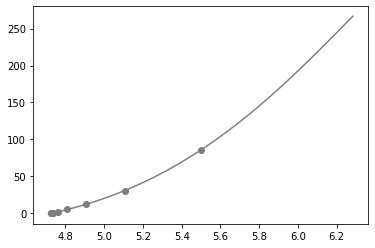

In [106]:
plot_bisection(f1, 7, f1_d, 1e-7)

In [62]:
# ograniczyć funkcję 2

c. Narysuj wykres zależności liczby potrzebnych iteracji od bezwzględnej dokładności.

d. Sprawdź czy spełnia ona równanie $n = \ceiling log b−a ε log 2$
gdzie n to liczba iteracji, ε bezwzględna dokładność, a a, b to granice przedziałów, poprzez porównanie na wykresie.

## 2. Metoda Newtona
Napisz funkcję realizującą metodę Newtona w oparciu o arytmetykę o zmiennej precyzji
(mpmath.mpf). Funkcja ma wykorzystywać dwa kryteria stopu:
* maksymalną liczbę iteracji
* moduł różnicy kolejnych przybliżeń mniejszy od danej wartości ε

Oprócz przybliżonej wartości pierwiastka funkcja ma zwrócić liczbę iteracji potrzebną do uzyskania określonej dokładności ε. Przetestuj działanie funkcji analogicznie do punktów a-c z poprzedniego zadania. Czy wykres zbieżności jest inny w przypadku metody bisekcji? Zinterpretuj wyniki.

M. Hawryluk 15.04.2021